# hi

In [72]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [2]:
df = pd.read_csv('data/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    print("\n")

---- class ---
e    4208
p    3916
Name: class, dtype: int64


---- cap-shape ---
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


---- cap-surface ---
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


---- cap-color ---
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64


---- bruises ---
f    4748
t    3376
Name: bruises, dtype: int64


---- odor ---
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64


---- gill-attachment ---
f    7914
a     210
Name: gill-attachment, dtype: int64


---- gill-spacing ---
c    6812
w    1312
Name: gill-spacing, dtype: int64


---- gill-size ---
b    5612
n    2512
Name: gill-size, dtype: int64


---- gill-color ---
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-

In [25]:
for val in df.columns:
  print(val, df[val].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


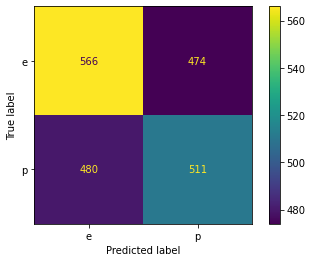

In [9]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train, y_train)

plot_confusion_matrix(baseline, X_test, y_test);

In [10]:
baseline_accuracy = accuracy_score(y_test, baseline.predict(X_test))
baseline_recall = recall_score(y_test, baseline.predict(X_test),pos_label="e")
baseline_precision = precision_score(y_test, baseline.predict(X_test),pos_label="e")
baseline_f1 = f1_score(y_test, baseline.predict(X_test),pos_label="e")

In [11]:
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} 
Recall
Baseline: {baseline_recall:1.3f} 
Precision
Baseline: {baseline_precision:1.3f} 
F1 Score
Baseline: {baseline_f1:1.3f} 
""")



Accuracy
Baseline: 0.530 
Recall
Baseline: 0.544 
Precision
Baseline: 0.541 
F1 Score
Baseline: 0.543 



In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

X_train_enc = ohe.fit_transform(X_train).toarray()

X_test_enc = ohe.transform(X_test).toarray()

In [55]:
enc_df = pd.DataFrame(X_train_enc, columns=ohe.get_feature_names(X_train.columns))

enc_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


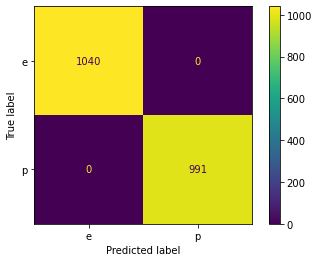

In [41]:
model = LogisticRegression(random_state=42)

model.fit(X_train_enc,y_train)

plot_confusion_matrix(model, X_test_enc, y_test);

In [42]:
model_accuracy = accuracy_score(y_test, model.predict(X_test_enc))
model_recall = recall_score(y_test, model.predict(X_test_enc),pos_label="e")
model_precision = precision_score(y_test, model.predict(X_test_enc),pos_label="e")
model_f1 = f1_score(y_test, model.predict(X_test_enc),pos_label="e")

In [43]:
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f}| Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f}| Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f}| Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1:1.3f}| Fitted Model: {model_f1:1.3f}
""")



Accuracy
Baseline: 0.530| Fitted Model: 1.000
Recall
Baseline: 0.544| Fitted Model: 1.000
Precision
Baseline: 0.541| Fitted Model: 1.000
F1 Score
Baseline: 0.543| Fitted Model: 1.000



In [16]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [44]:
gnb = GaussianNB()
gnb.fit(X_train_enc, y_train)
gnb.score(X_test_enc, y_test)

0.9601181683899557

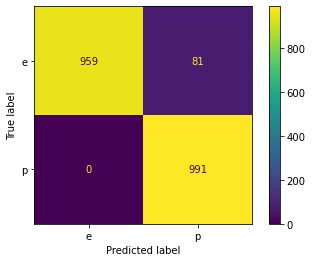

In [46]:
plot_confusion_matrix(gnb, X_test_enc, y_test);

In [47]:
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test_enc))
gnb_recall = recall_score(y_test, gnb.predict(X_test_enc),pos_label="e")
gnb_precision = precision_score(y_test, gnb.predict(X_test_enc),pos_label="e")
gnb_f1 = f1_score(y_test, gnb.predict(X_test_enc),pos_label="e")

In [48]:
print(f"""
Accuracy
Naive Bayes: {gnb_accuracy:1.3f}
Recall
Naive Bayes: {gnb_recall:1.3f}
Precision
Naive Bayes: {gnb_precision:1.3f}
F1 Score
Naive Bayes: {gnb_f1:1.3f}
""")



Accuracy
Naive Bayes: 0.960
Recall
Naive Bayes: 0.922
Precision
Naive Bayes: 1.000
F1 Score
Naive Bayes: 0.959



In [52]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [50]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_enc, y_train)

DecisionTreeClassifier(random_state=42)

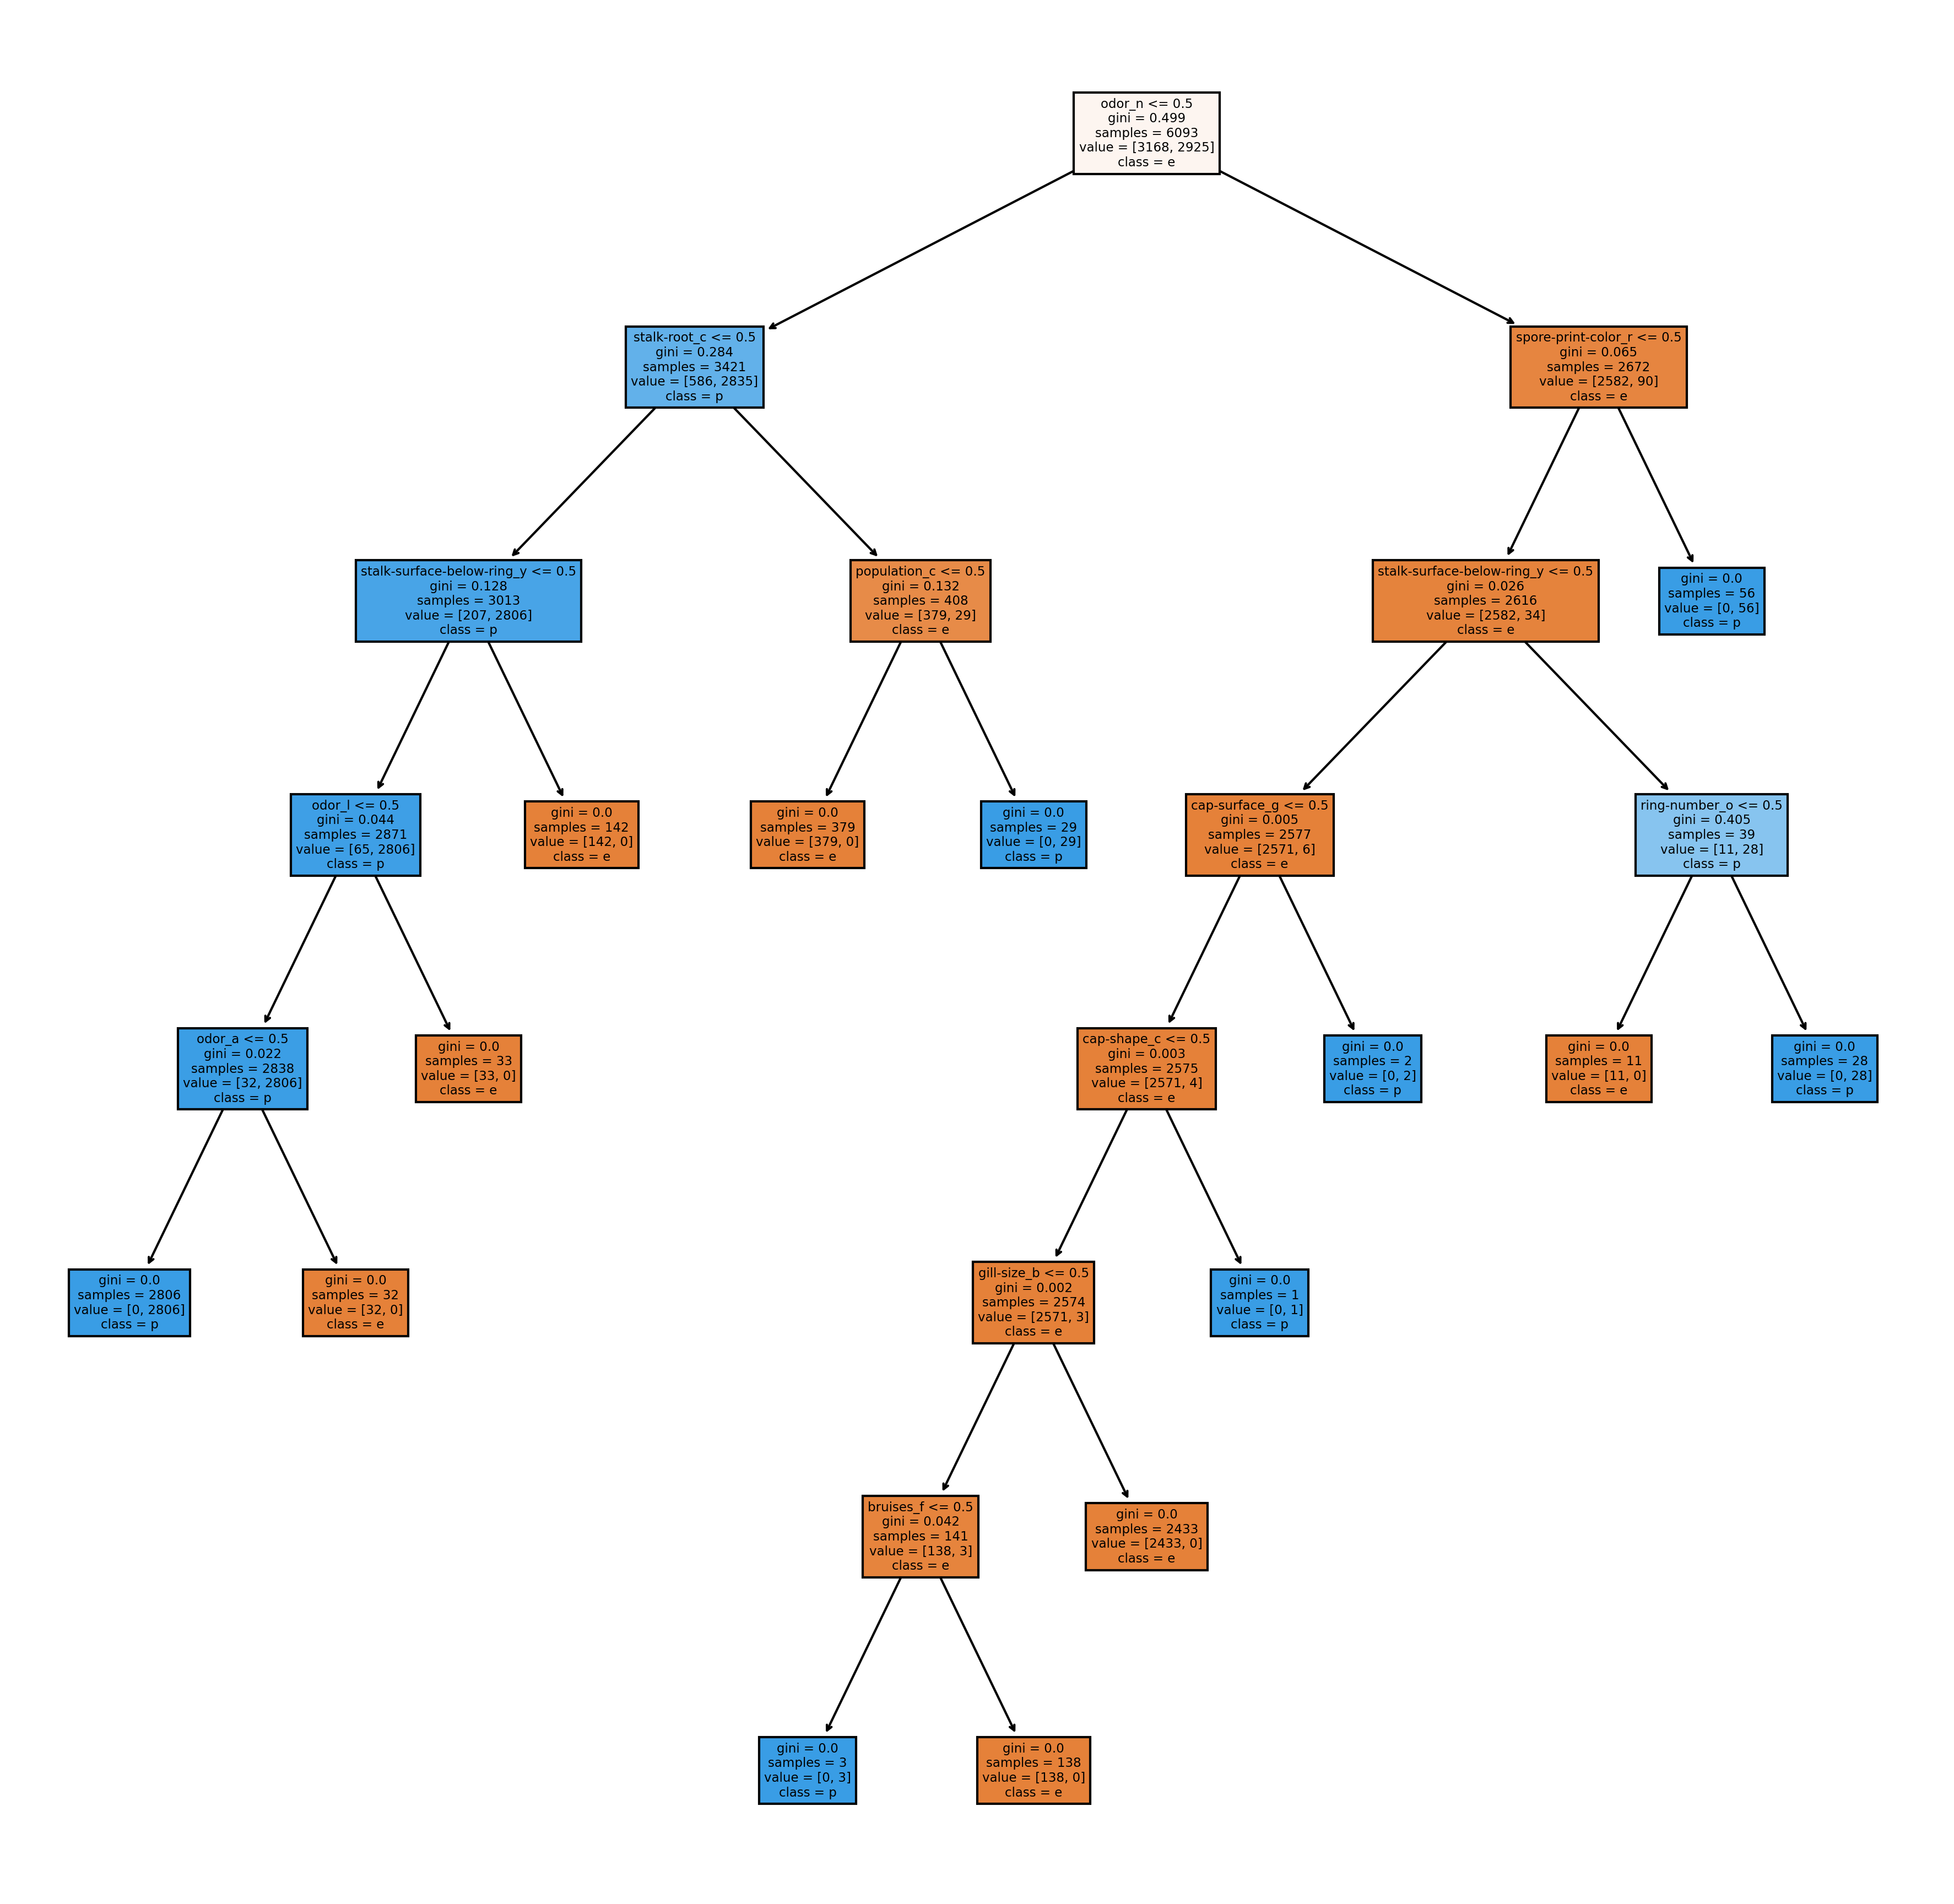

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(clf,
               feature_names = enc_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

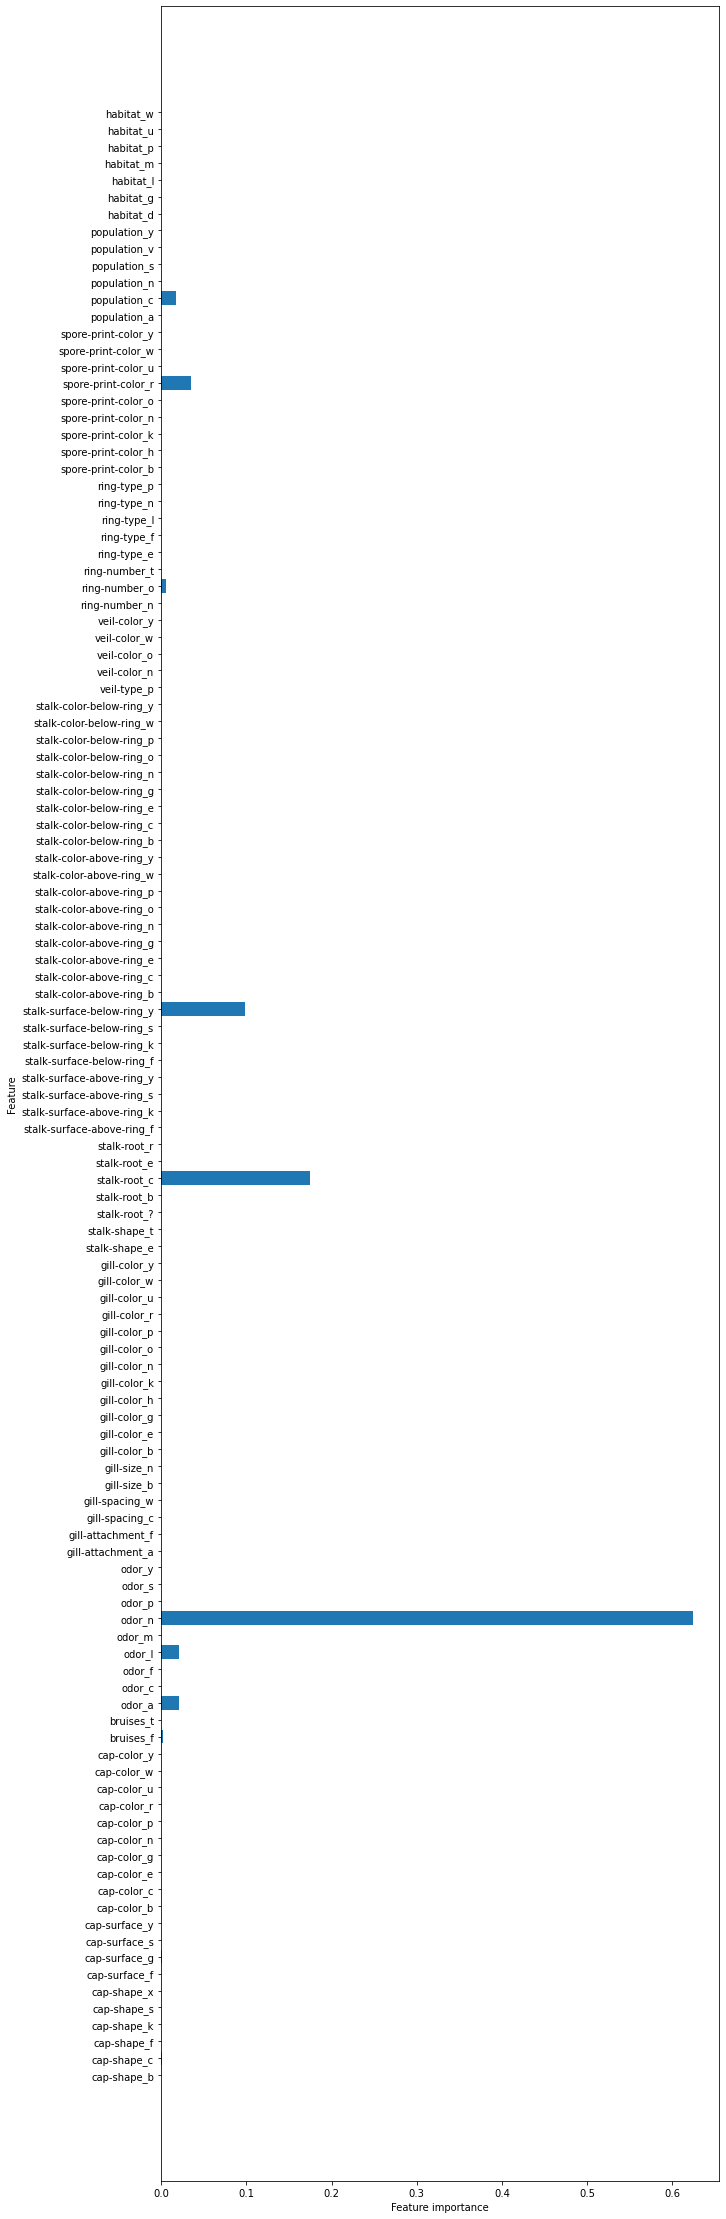

In [71]:
def plot_feature_importances(model):
    n_features = X_train_enc.shape[1]
    plt.figure(figsize=(10,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), enc_df.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [57]:
clf_accuracy = accuracy_score(y_test, clf.predict(X_test_enc))
clf_recall = recall_score(y_test, clf.predict(X_test_enc),pos_label="e")
clf_precision = precision_score(y_test, clf.predict(X_test_enc),pos_label="e")
clf_f1 = f1_score(y_test, clf.predict(X_test_enc),pos_label="e")
print(f"""
Accuracy
Decision Tree 1: {clf_accuracy:1.3f}
Recall
Decision Tree 1: {clf_recall:1.3f}
Precision
Decision Tree 1: {clf_precision:1.3f}
F1 Score
Decision Tree 1: {clf_f1:1.3f}
""")


Accuracy
Decision Tree: 1.000
Recall
Decision Tree: 1.000
Precision
Decision Tree: 1.000
F1 Score
Decision Tree: 1.000



In [83]:
clf2 = DecisionTreeClassifier(random_state=42, max_depth=2)

clf2.fit(X_train_enc, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

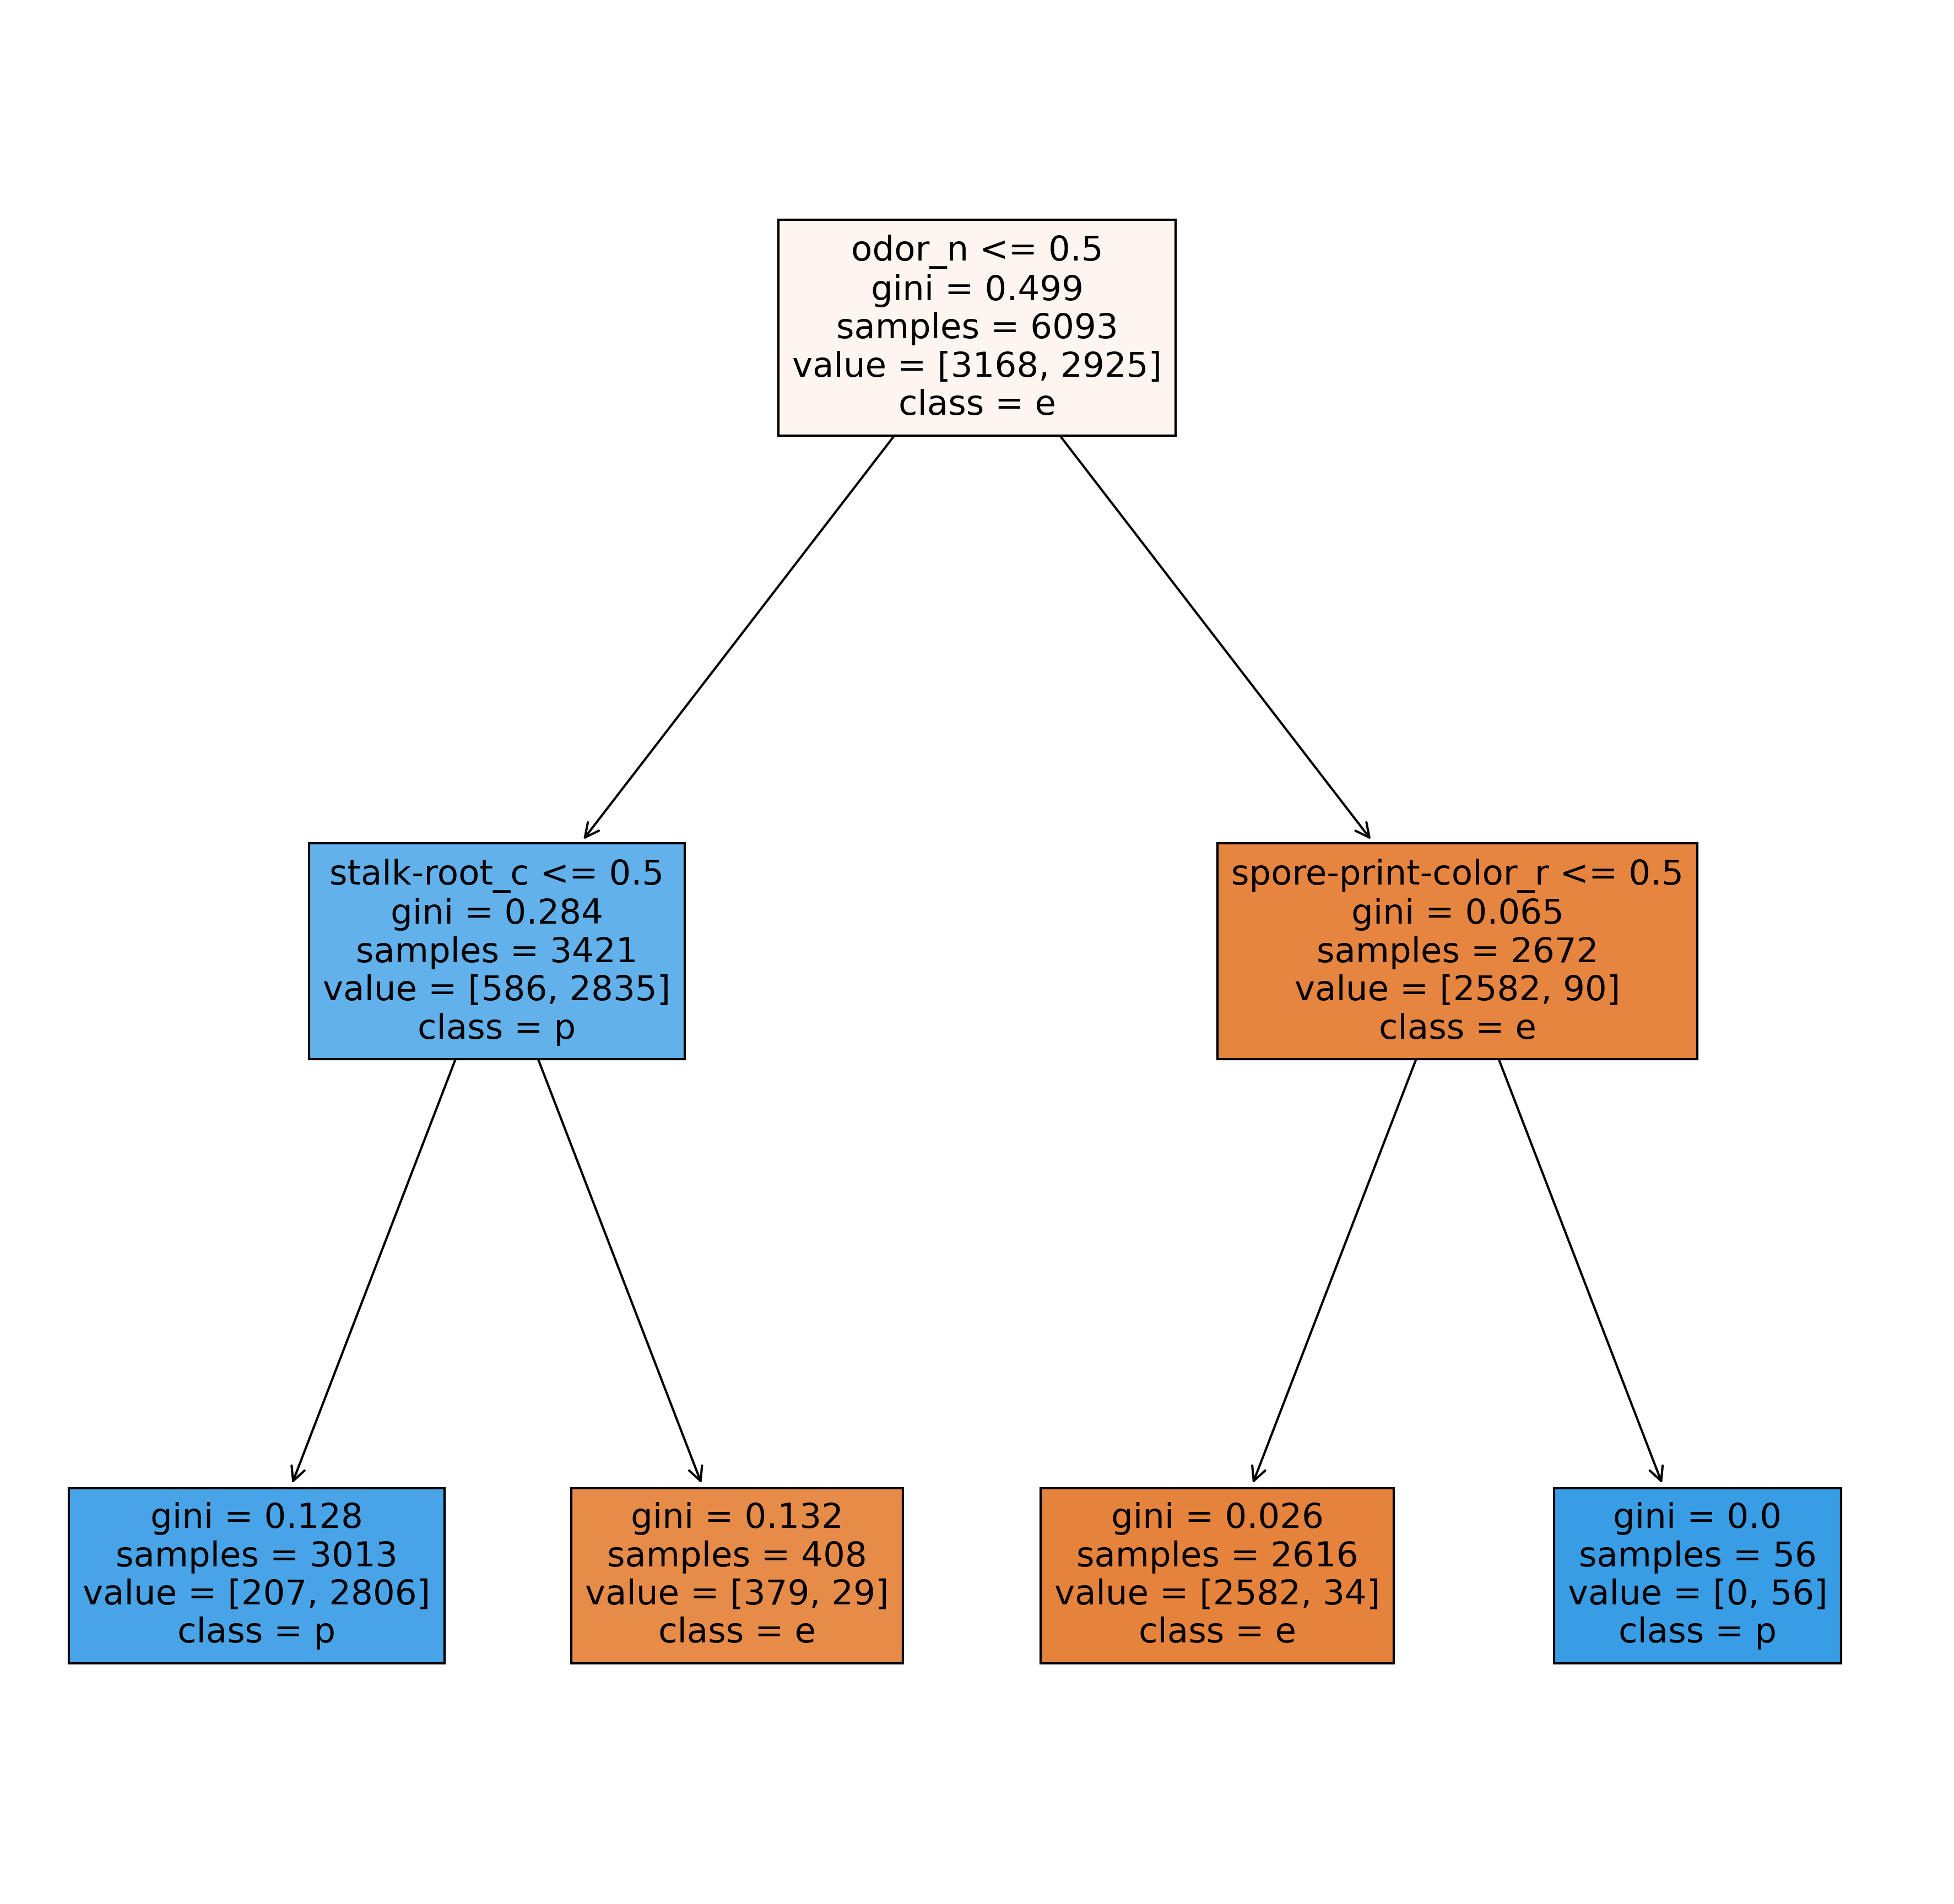

In [84]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(clf2,
               feature_names = enc_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

In [85]:
clf2_accuracy = accuracy_score(y_test, clf2.predict(X_test_enc))
clf2_recall = recall_score(y_test, clf2.predict(X_test_enc),pos_label="e")
clf2_precision = precision_score(y_test, clf2.predict(X_test_enc),pos_label="e")
clf2_f1 = f1_score(y_test, clf2.predict(X_test_enc),pos_label="e")
print(f"""
Accuracy
Decision Tree 2: {clf2_accuracy:1.3f}
Recall
Decision Tree 2: {clf2_recall:1.3f}
Precision
Decision Tree 2: {clf2_precision:1.3f}
F1 Score
Decision Tree 2: {clf2_f1:1.3f}
""")


Accuracy
Decision Tree 2: 0.950
Recall
Decision Tree 2: 0.922
Precision
Decision Tree 2: 0.979
F1 Score
Decision Tree 2: 0.950



In [95]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, max_depth= 2)
forest.fit(X_train_enc, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

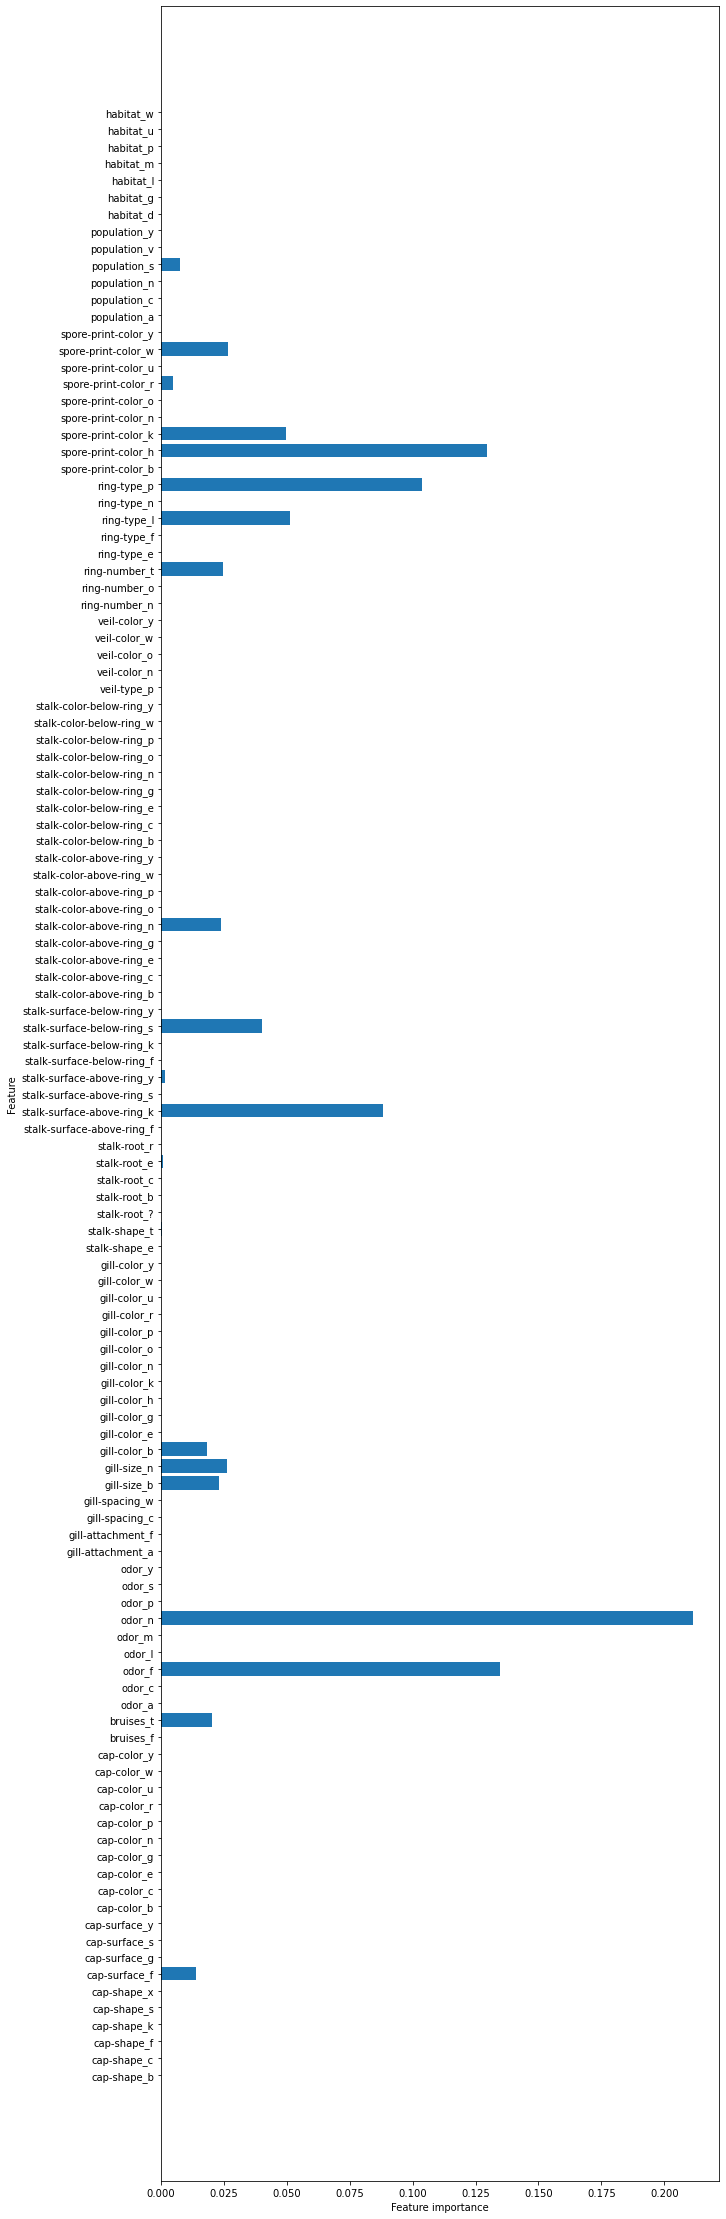

In [96]:
plot_feature_importances(forest)

In [97]:
forest_accuracy = accuracy_score(y_test, forest.predict(X_test_enc))
forest_recall = recall_score(y_test, forest.predict(X_test_enc),pos_label="e")
forest_precision = precision_score(y_test, forest.predict(X_test_enc),pos_label="e")
forest_f1 = f1_score(y_test, forest.predict(X_test_enc),pos_label="e")
print(f"""
Accuracy
Random Forest: {forest_accuracy:1.3f}
Recall
Random Forest: {forest_recall:1.3f}
Precision
Random Forest: {forest_precision:1.3f}
F1 Score
Random Forest: {forest_f1:1.3f}
""")


Accuracy
Random Forest: 0.927
Recall
Random Forest: 1.000
Precision
Random Forest: 0.875
F1 Score
Random Forest: 0.933



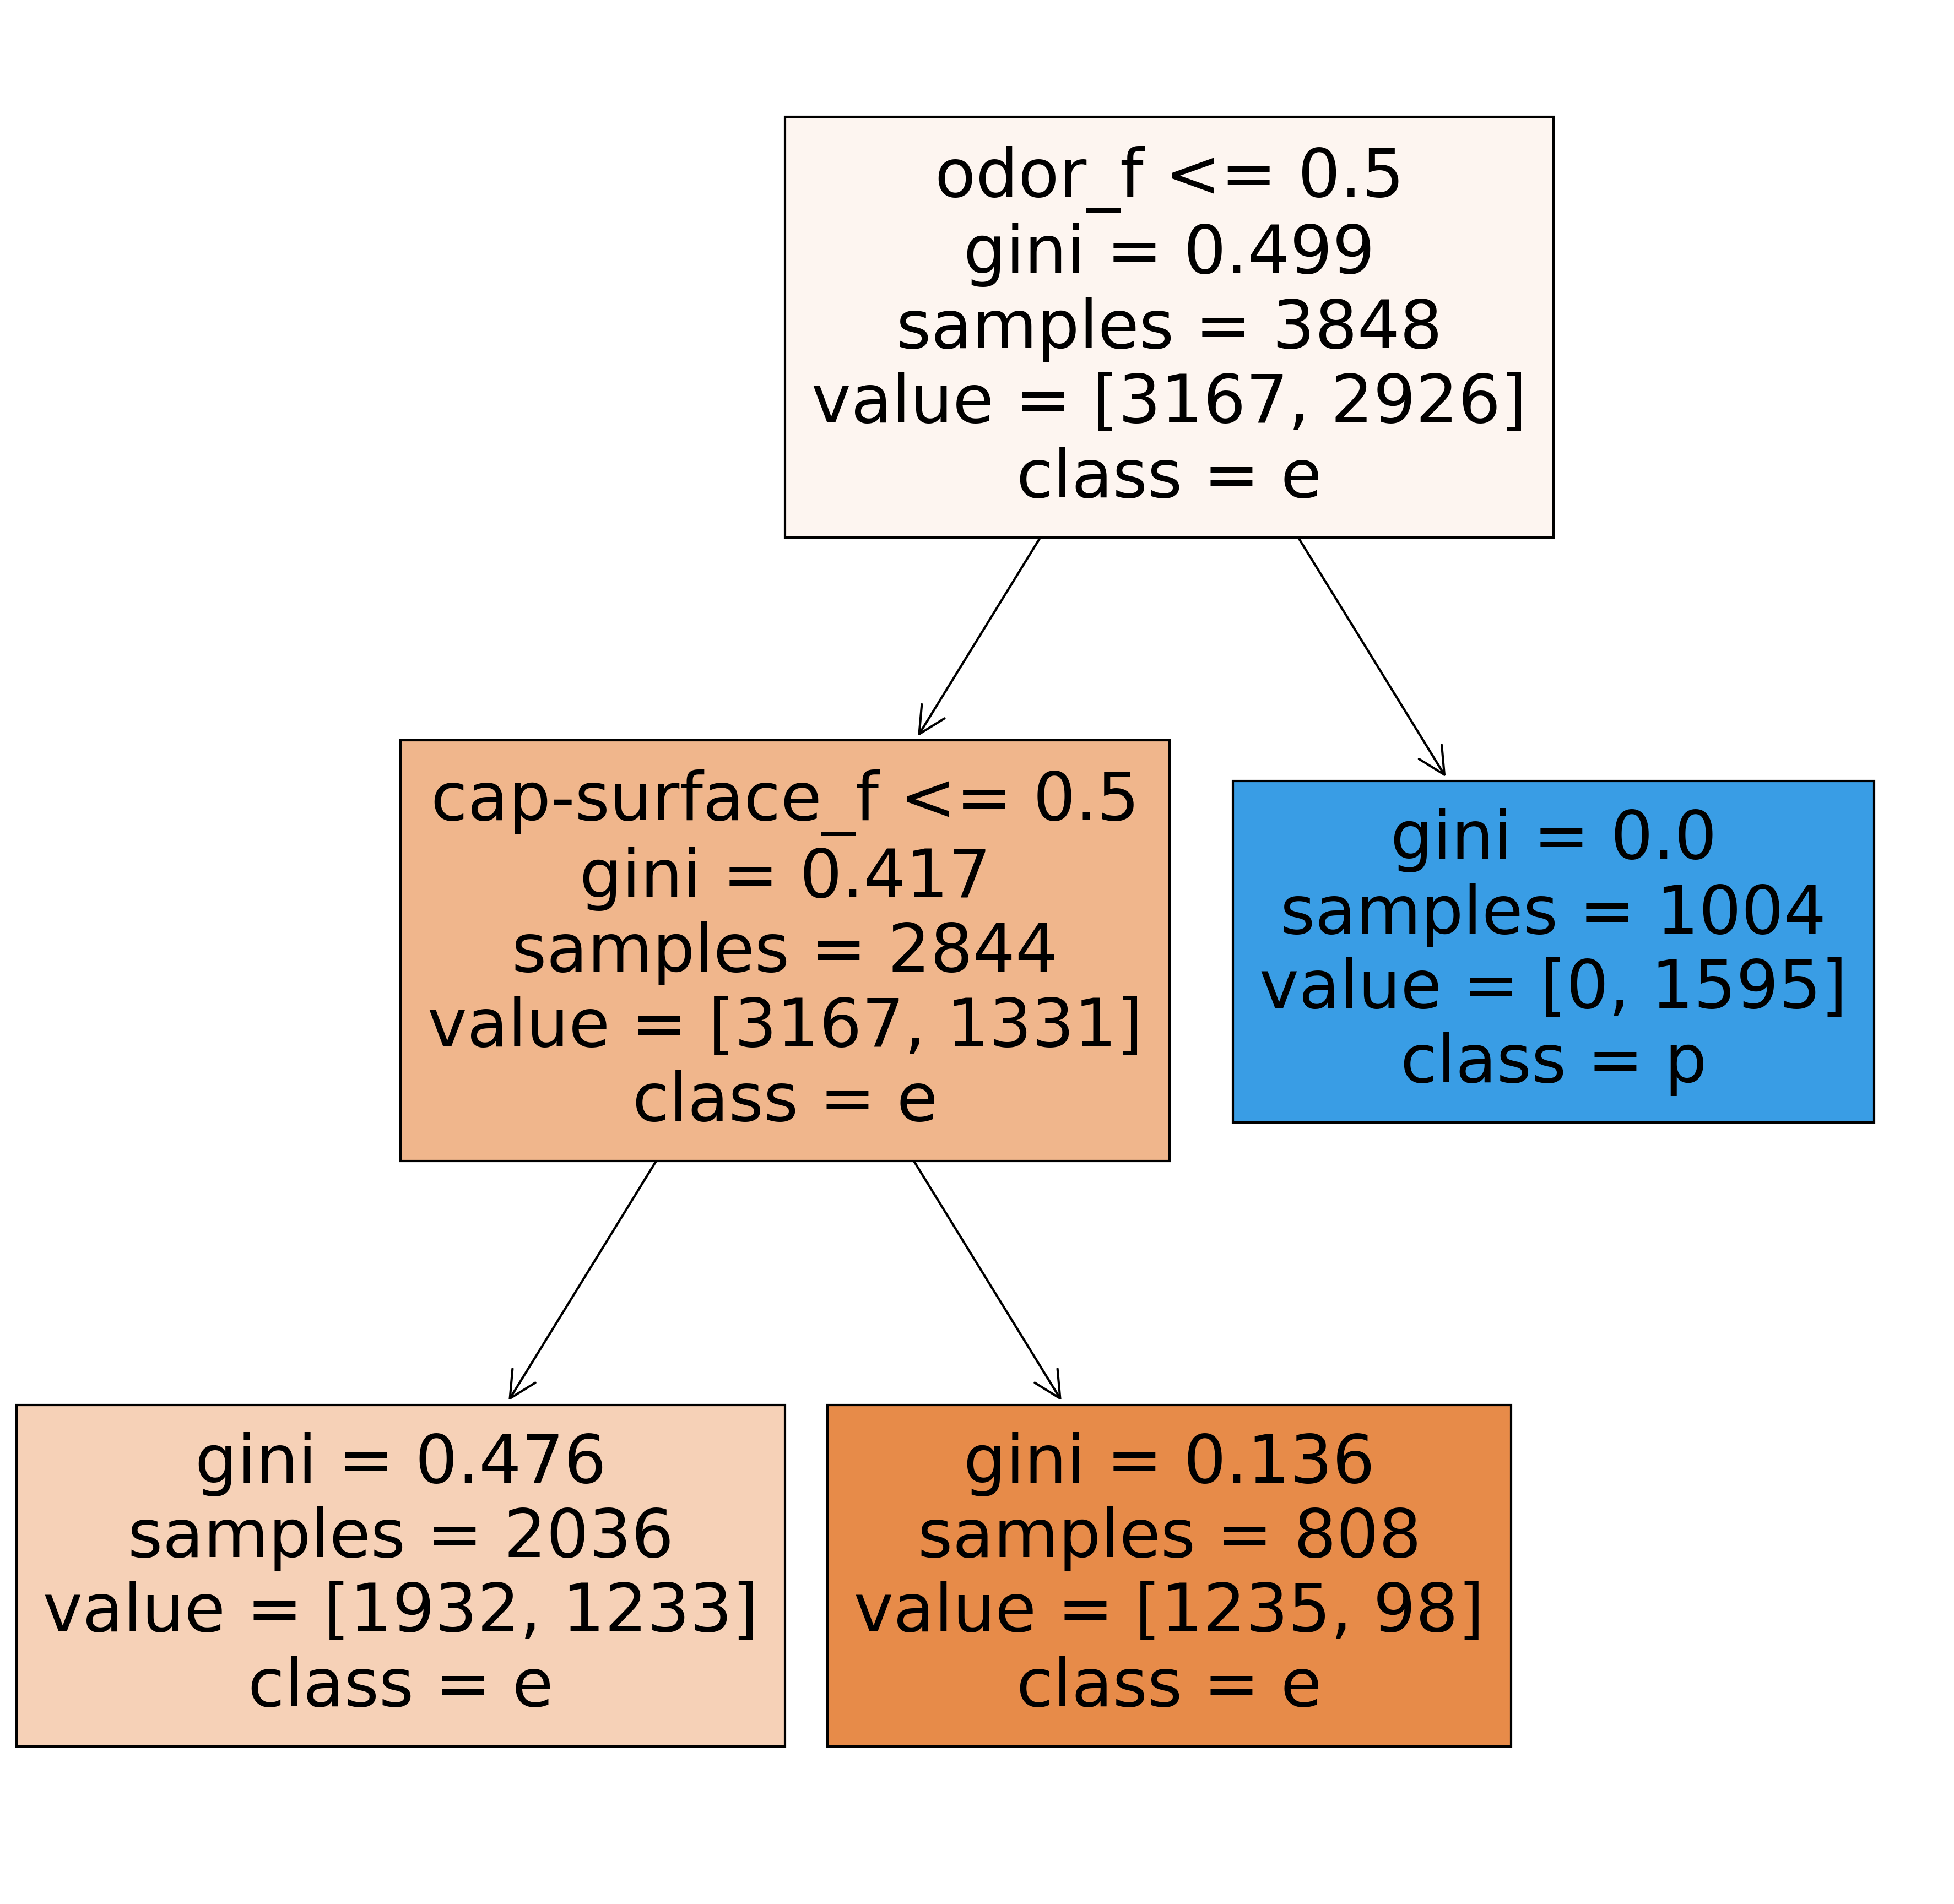

In [98]:
rf_tree_1 = forest.estimators_[0]
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(rf_tree_1,
               feature_names = enc_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

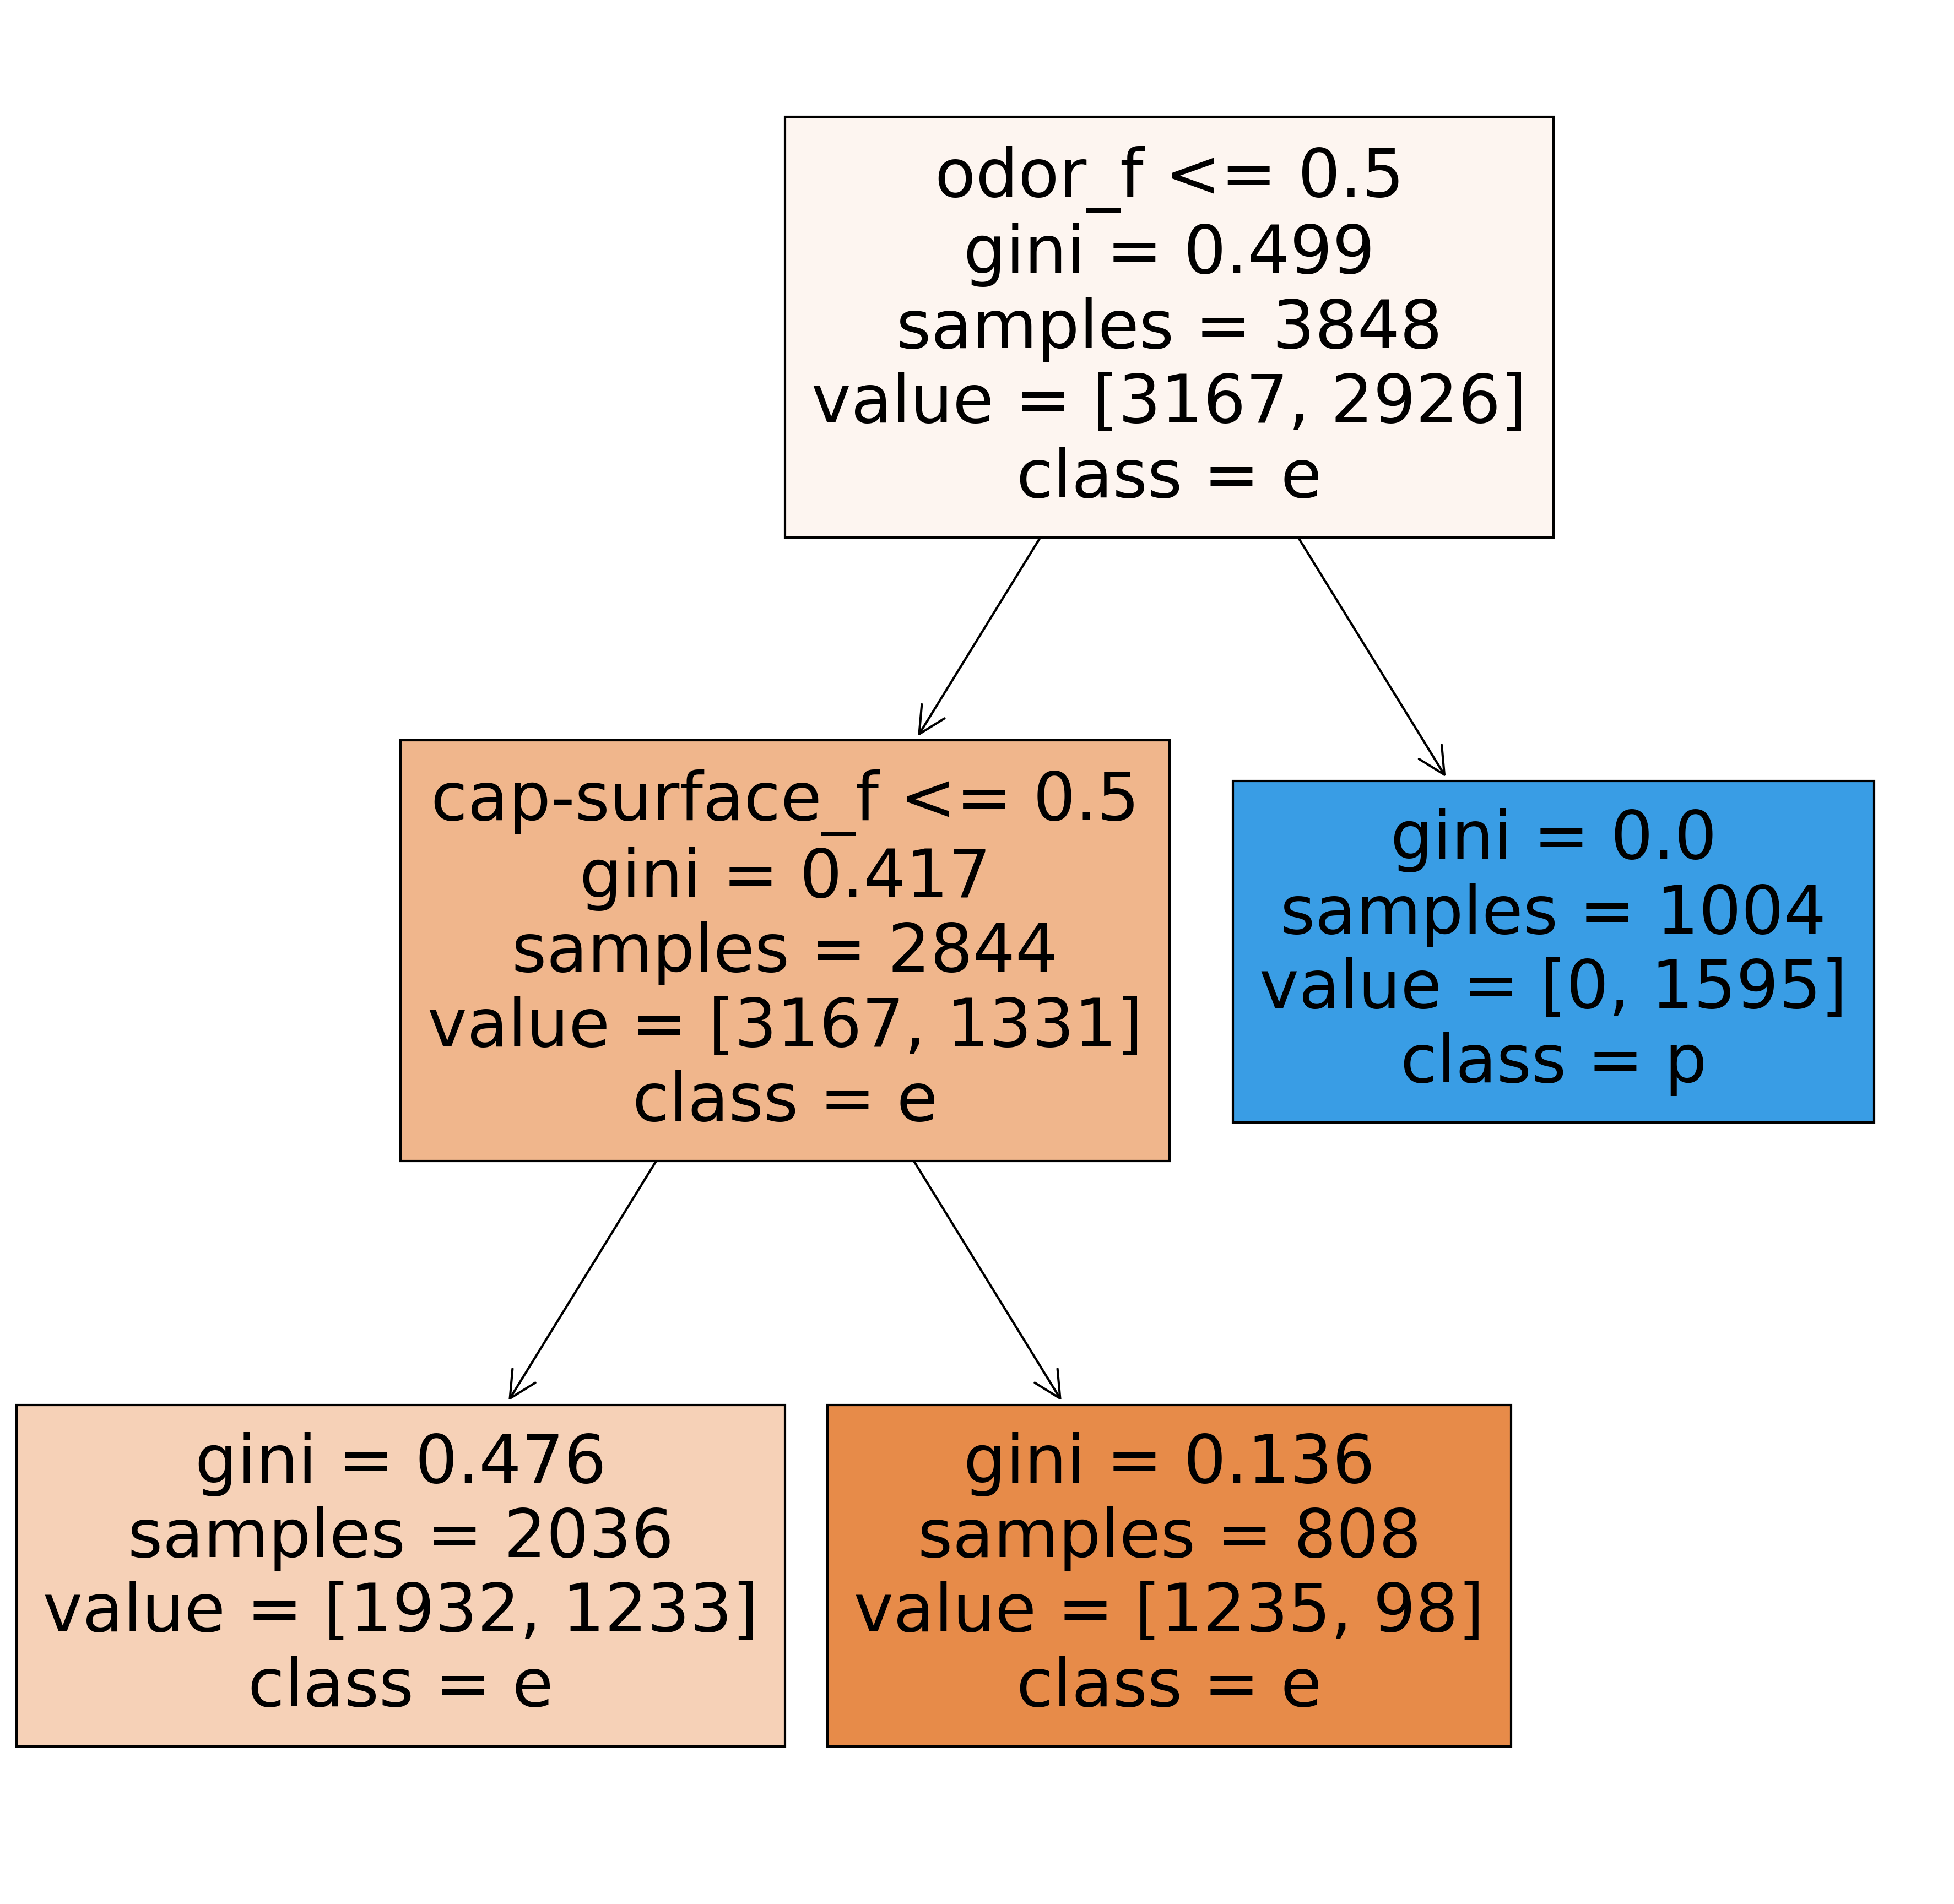

In [99]:
rf_tree_2 = forest.estimators_[1]
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(rf_tree_1,
               feature_names = enc_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();